In [1]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [2]:
boston = load_data("Boston")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [3]:
y = boston['crim']

In [4]:
X_loop = boston.columns.values.tolist()  # a list
X_loop.remove('crim')
X_loop

['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

In [5]:
slop = np.array([])
for x_single in X_loop:
    X = MS([x_single]).fit_transform(boston)
    model = sm.OLS(y, X);
    results = model.fit();
    slop = np.append(slop, results.params[1])
    print(summarize(results))

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

C:\Users\yiming\AppData\Local\Temp\ipykernel_14880\3465435769.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(boston, ax=ax);


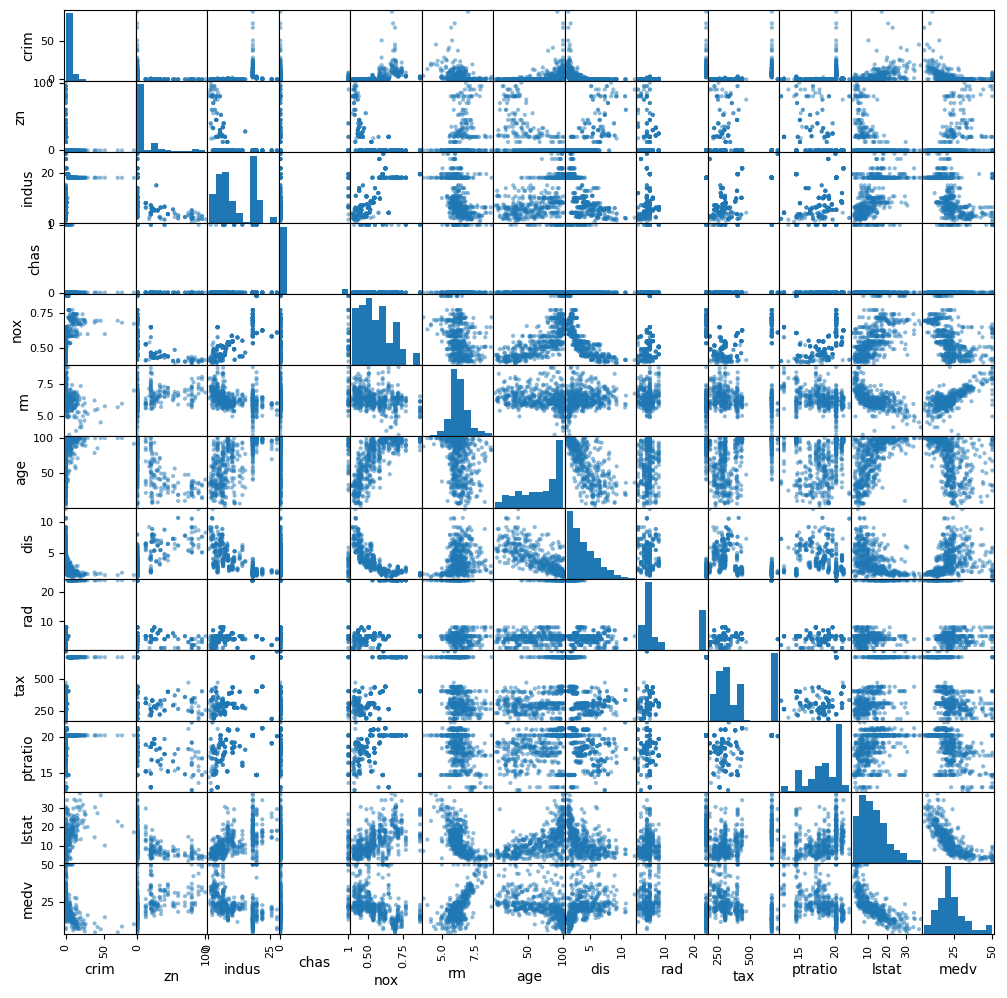

In [6]:
ax = plt.subplots(figsize=(12,12))[1]
pd.plotting.scatter_matrix(boston, ax=ax);

In [7]:
X = MS(X_loop).fit_transform(boston)
model = sm.OLS(y, X);
results_all = model.fit();
print(summarize(results_all))

              coef  std err      t  P>|t|
intercept  13.7784    7.082  1.946  0.052
zn          0.0457    0.019  2.433  0.015
indus      -0.0584    0.084 -0.698  0.486
chas       -0.8254    1.183 -0.697  0.486
nox        -9.9576    5.290 -1.882  0.060
rm          0.6289    0.607  1.036  0.301
age        -0.0008    0.018 -0.047  0.962
dis        -1.0122    0.282 -3.584  0.000
rad         0.6125    0.088  6.997  0.000
tax        -0.0038    0.005 -0.730  0.466
ptratio    -0.3041    0.186 -1.632  0.103
lstat       0.1388    0.076  1.833  0.067
medv       -0.2201    0.060 -3.678  0.000


In [8]:
slop

array([-7.39349774e-02,  5.09776331e-01, -1.89277655e+00,  3.12485312e+01,
       -2.68405122e+00,  1.07786227e-01, -1.55090168e+00,  6.17910927e-01,
        2.97422528e-02,  1.15198279e+00,  5.48804782e-01, -3.63159922e-01])

Text(0, 0.5, 'Slopes estimated by multiple variants LR')

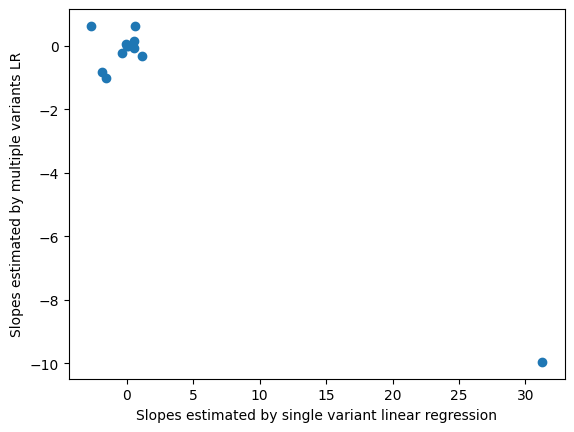

In [9]:
ax = plt.subplots()[1]
ax.plot(slop, results_all.params[1:], 'o')
ax.set_xlabel('Slopes estimated by single variant linear regression')
ax.set_ylabel('Slopes estimated by multiple variants LR')

In [38]:
for x_single in X_loop:
    X = MS([poly(x_single, degree=3)]).fit_transform(boston)
    model = sm.OLS(y, X);
    results = model.fit();
    print(summarize(results))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
                                 coef       std err      t  P>|t|
intercept                9.971000e+12  2.100000e+13  0.475  0.635
poly(chas, degree=3)[0]  1.173000e+13  2.470000e+13  0.475  0.635
poly(chas, degree=3)[1]  1.249000e+14  2.630000e+14  0.475  0.635
poly(chas, degree=3)[2] -3.332000e+13  7.020000e+13 -0.475  0.635
                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.

The first coefficient, poly[0], should be the highest order.

In [37]:
def draw_curve(ax, a, b, c, d, *args, **kwargs):
    # add a cubic curve ax^3 + bx^2 + cx + d to axis ax
    xlim = ax.get_xlim()
    xs = np.linspace(xlim[0], xlim[1], 100)
    ax.plot(xs, a * xs**3 + b*xs**2 + c*xs + d, *args, **kwargs)

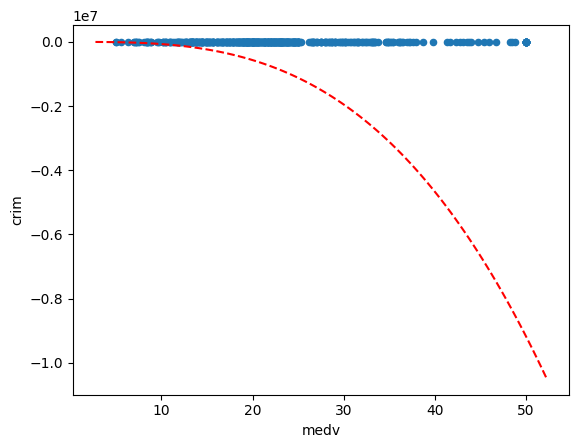

In [36]:
ax = boston.plot('medv', 'crim', 'scatter')
draw_curve(ax, results.params[1], results.params[2], results.params[3], results.params[0], 'r--')

I don't know why the fitted curve does not match the data when the p-value is very low.